# Lab-6.1: Time-series visualization

**Author**: J. Hickman

**Instructions** 

<!-- [Click here to download the notebook for this lab](lab-1.2.ipynb.zip) -->

This notebook consists of TWO parts

(1): **Demonstration section:** The instructors will work through this section during the lab period. It is meant to be educational, with various code examples provided for you. You should understand all code in the demonstration section and should run the cells on your local machine before attempting the assignment.

(2): **Lab assignment:** A short assignment section is also provided after the demonstration. You will have time to work on this during the lab but can finish it at home. 

**NOTE**: It is recommended that you complete this `.ipynb` file in VS-code. Activate the `anly503` environment by selecting the kernel in the upper-left corner of VS-code.  


**Submission:**

* You need to upload ONE documents to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

## Install 

We will be using the following package

`python -m pip install yfinance` 

In [104]:
# Import the yfinance. If you get module not found error the run !pip install yfinance from your Jupyter notebook
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np 
import plotly.express as px
from IPython.display import IFrame

# Data

## Getting data: Yahoo Finance 

- This package provides a method to get stock data using Python' via the Yahoo API
  - For more see the following [source](https://blog.quantinsti.com/historical-market-data-python-api/)
- Let's retrieval of the `daily` historical price for `AAPL` (Apple)
  - Could also use (PDR S&P 500 ETF Trust (SPY)) or any other stock

In [105]:
start_date='2000-01-01'
end_date='2023-03-01'
stock_ticker="AAPL"; #"SPY"
# Get the data for the stock AAPL
df = yf.download(stock_ticker,start_date,end_date)

# Plot the close price of the AAPL
print("Type =",type(df))
print("N =",len(df))

# there are 252 trading days per year
print("Sanity check:",len(df['Adj Close'])/(252),"years")

df=df.reset_index()

print("head:\n",df.head())
# print("head = ",df['Adj Close'].tail())



[*********************100%***********************]  1 of 1 completed
Type = <class 'pandas.core.frame.DataFrame'>
N = 5826
Sanity check: 23.11904761904762 years
head:
         Date      Open      High       Low     Close  Adj Close     Volume
0 2000-01-03  0.936384  1.004464  0.907924  0.999442   0.850643  535796800
1 2000-01-04  0.966518  0.987723  0.903460  0.915179   0.778926  512377600
2 2000-01-05  0.926339  0.987165  0.919643  0.928571   0.790324  778321600
3 2000-01-06  0.947545  0.955357  0.848214  0.848214   0.721931  767972800
4 2000-01-07  0.861607  0.901786  0.852679  0.888393   0.756128  460734400


## Expected results

* The following is from the Yahoo website, it helps make sense of the downloaded data

![](img/2023-04-16-13-09-02.png)

## Visualization-1

[*********************100%***********************]  2 of 2 completed


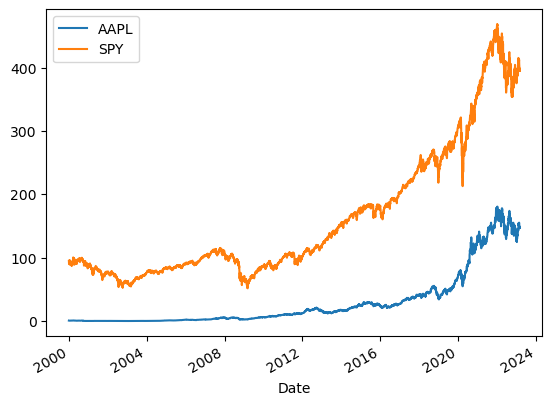

In [106]:
# Get the data for the SPY (an ETF on the S&P 500 index) and the stock Apple by specifying the stock ticker, start date, and end date
df1 = yf.download(['SPY', 'AAPL'],start_date,end_date)
# Plot the adjusted close prices
df1["Adj Close"].plot()
plt.show()

## Minute level data

* Through yfinance, you can also fetch the data of minute frequency. You can download for other frequency by just tweaking the interval parameter on line no 8 below. Following values are supported in the interval: 1m, 5m, 15m,

[*********************100%***********************]  1 of 1 completed


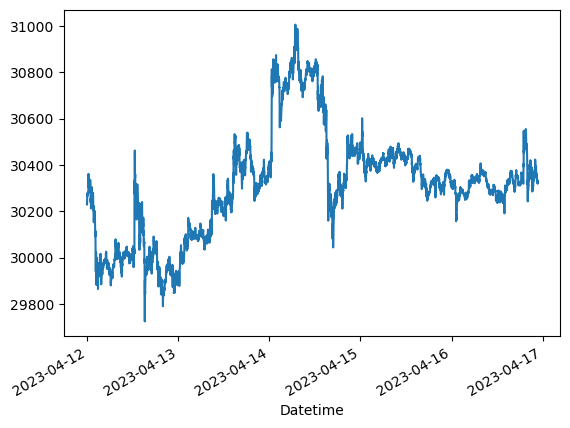

In [107]:
data = yf.download(
		tickers=['BTC-USD'], 
		# use "period" instead of start/end
		# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
		# (optional, default is '1mo')
		period="5d",
		# fetch data by interval (including intraday if period < 60 days)
		# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
       	# (optional, default is '1d')
		interval="1m")
# Plot the close prices
data.Close.plot()
plt.show()

# Basic visualization

## Get data

* Download two time-series for Apple and the S&P 500

In [108]:
# GET DATA AS NUMPY ARRAY 

start_date='2000-01-01'
end_date='2023-03-01'
stock_ticker_1="AAPL";  
stock_ticker_2="SPY"

df1 = yf.download(stock_ticker_1,start_date,end_date)
df1 = df1.reset_index()

df2 = yf.download(stock_ticker_2,start_date,end_date)
df2 = df2.reset_index()

# CONVERT TO NUMPY ARRAYS FOR LATER USE
y1=np.array(df1["Close"])
y2=np.array(df2["Close"])
t=np.array([*range(0,len(y1))]) #market days elapsed since start_date


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Generate a line-plot

In [109]:
# import plotly.io as pio
# pio.renderers.default = "plotly_mimetype+notebook_connected"

# GET DATA
title=str(stock_ticker_1)+" (blue) & "+str(stock_ticker_2)+' (red) stock price'
# GENERATE PLOTLY FIGURE
fig = px.line(df1,x="Date",y="Close", title=title)
fig.add_scatter(x=df2['Date'], y=df2['Close'], mode='lines')

fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Price (USD)",
    template="plotly_white",
    showlegend=False
)

fig.show()

# SAVE TO FILES
# file_name="./img/plotly-0.html"
# fig.write_html(file_name)
# IFrame(src=file_name, width=800, height=600)

# Plotting utility function-2

Line-plot plotting function for a multiple time-series input in a list

In [110]:
def plotly_line_plot(t,y,title="Plot",x_label="Open market days since "+start_date+" (days)",y_label="Stock price (USD)"):

    # GENERATE PLOTLY FIGURE
    fig = px.line(x=t,y=y[0], title=title)
    
    # ADD MORE
    for i in range(1,len(y)):
        fig.add_scatter(x=t,y=y[i], mode='lines')

    fig.update_layout(
        xaxis_title=x_label,
        yaxis_title=y_label,
        template="plotly_white",
        showlegend=False
    )
    fig.show()

# SINGLE SERIES 
plotly_line_plot(t,[y1],title=str(stock_ticker_1)+" stock price")

In [111]:

# MULTIPLE SERIES 
plotly_line_plot(t,[y1,y2],title=str(stock_ticker_1)+" (red) & "+str(stock_ticker_2)+" (blue) stock price")

## Pair plot 

In [112]:
# GET DATA
title="Pairplot: "+str(stock_ticker_1)+" & "+str(stock_ticker_2)+" inter-dependance"
# GENERATE PLOTLY FIGURE
fig = px.scatter(x=y1,y=y2, title=title,height=600,width=800)

fig.update_layout(
    xaxis_title=stock_ticker_1+" Price (USD)",
    yaxis_title=stock_ticker_2+" Price (USD)",
    template="plotly_white",
    showlegend=False
)

fig.show()

## Fit exponential trend  

* Visualize long term trend

In [113]:
# CURVE FIT 
from scipy.optimize import curve_fit

def f(t, a, b, c,d):
    return a * np.exp(b * (t-d)) + c

popt1, pcov = curve_fit(f, t, y1,p0=[1000.,0.001,1.0,10])
popt2, pcov = curve_fit(f, t, y2,p0=[1000.,0.001,1.0,10])

print("Fitting parameters-2:",popt1)
print("Fitting parameters-2:",popt2)


Fitting parameters-2: [2.42256261e+01 1.05764949e-03 1.05601942e+00 3.91294347e+03]
Fitting parameters-2: [6.80954872e+00 7.00735319e-04 9.93162744e+01 1.18032215e+02]


In [114]:
plotly_line_plot(t,[y1,f(t,*popt1),y2,f(t,*popt2)],title=str(stock_ticker_1)+" (blue) stock price & exponential fit (green) as compared to SP500 in red")

## Visualize deviation from exponential trend 

In [115]:
plotly_line_plot(t,[y1-f(t,*popt1),y2-f(t,*popt2)],title=str(stock_ticker_1)+" & "+ str(stock_ticker_2)+" deviation from exponential trend",y_label="Deviation from trend")

## Deviation pair plot 

In [116]:
# GET DATA
title="Pairplot: "+str(stock_ticker_1)+" & "+str(stock_ticker_2)+" inter-dependance"
# GENERATE PLOTLY FIGURE
fig = px.scatter(x=y1-f(t,*popt1),y=y2-f(t,*popt2), title=title,height=600,width=800)

fig.update_layout(
    xaxis_title=stock_ticker_1+" Price (USD)",
    yaxis_title=stock_ticker_2+" Price (USD)",
    template="plotly_white",
    showlegend=False
)

fig.show()

## Periodic wrapping

* When computing lag plots and correlation functions, there are two ways to construct the required array. 
  * (1) with periodic wrapping, in this case the array size stays the same (periodic signals)
  * (2) without periodic wrapping, in this case the array size shrinks  (aperiodic signals)
* As we will see, the chosen method effects the observed results
* The following shows simple examples of the two possible cases 


In [117]:
# WITH WRAPPING 

tmp=np.array([0,1,2,3])
print(np.roll(tmp,0))
print(np.roll(tmp,1))
print(np.roll(tmp,2))
print(np.roll(tmp,3))
print(np.roll(tmp,4))

[0 1 2 3]
[3 0 1 2]
[2 3 0 1]
[1 2 3 0]
[0 1 2 3]


In [118]:
# WITHOUT WRAPPING 

# original y0,y1,y2,y3,4
# lag1
    # ytm1: y0,y1,y2,y3
    # yt:   y1,y2,y3,y4
# lag2 
    # ytm2: y0,y1,y2 
    # yt:   y2,y3,y4 
    
# TEST
print(tmp[0:])
print(tmp[0:])
print(tmp[0:-1])
print(tmp[1:])
print(tmp[0:-2])
print(tmp[2:])  


[0 1 2 3]
[0 1 2 3]
[0 1 2]
[1 2 3]
[0 1]
[2 3]


## Differencing (lag-1 day)

* Apply differencing method with lag=1 and re-visualize
* Notice how only very rapid (daily) oscillations remain (everything that is constant over 1 day is removed)

In [119]:
# MODIFIY DATA
LD=1 #lag_for_differencing
print(len(y1),len(y1[0:-LD]),len(y1[LD:]))

# GENERATE PLOTLY FIGURE
title=str(stock_ticker_1)+" after applying differencing using a lag of "+str(LD)+ " day"
plotly_line_plot([*range(0,len(y1[0:-LD]))],[y1[0:-LD]-y1[LD:]],title=title,y_label="differencing with lag="+str(LD))



5826 5825 5825


## Lag-plots 

* A lag plot checks whether a data set or time series is random or not. 
* Random data should not exhibit any identifiable structure in the lag plot. 
* Non-random structure in the lag plot indicates that the underlying data are not random. 


In [120]:
# UTILITY FUNCTION

import warnings
warnings.filterwarnings("ignore")

def lag_plots(y1,y2,d_lag=1,NLag=5):
    plots_per_row=3
    num_rows=int(np.ceil((NLag+1)/plots_per_row))  
    #print(plots_per_row,num_rows)

    fig, axs = plt.subplots(num_rows,plots_per_row,figsize=(12, 3.25*num_rows))
    fig.suptitle('Lag plots')

    # # UN-LAGGED 
    axs[0,0].plot(y2, y1,"o")
    axs[0,0].set_xlabel("y2_t");  axs[0,0].set_ylabel("y1_t");

    row=0; lag=d_lag
    while row<num_rows:
        col=0
        if(row==0): col=1
        while col<plots_per_row:
            #print(row,col)
            tmp1=y1[0:-lag] #stationary
            tmp2=y2[lag:]
            axs[row,col].plot(tmp2, tmp1,"o")
            label="y2 lag="+str(lag)
            # axs[row,col].set_ylabel("y1_t");  
            axs[row,col].set_xlabel(label);
            lag+=d_lag
            col+=1
            if(lag/d_lag>NLag): break
        if(lag/d_lag>NLag): break
        row+=1
        
    fig.show()

## Lag plots: Apple-Apple (no differencing)

* There is very long term correlation due to the exponential trend

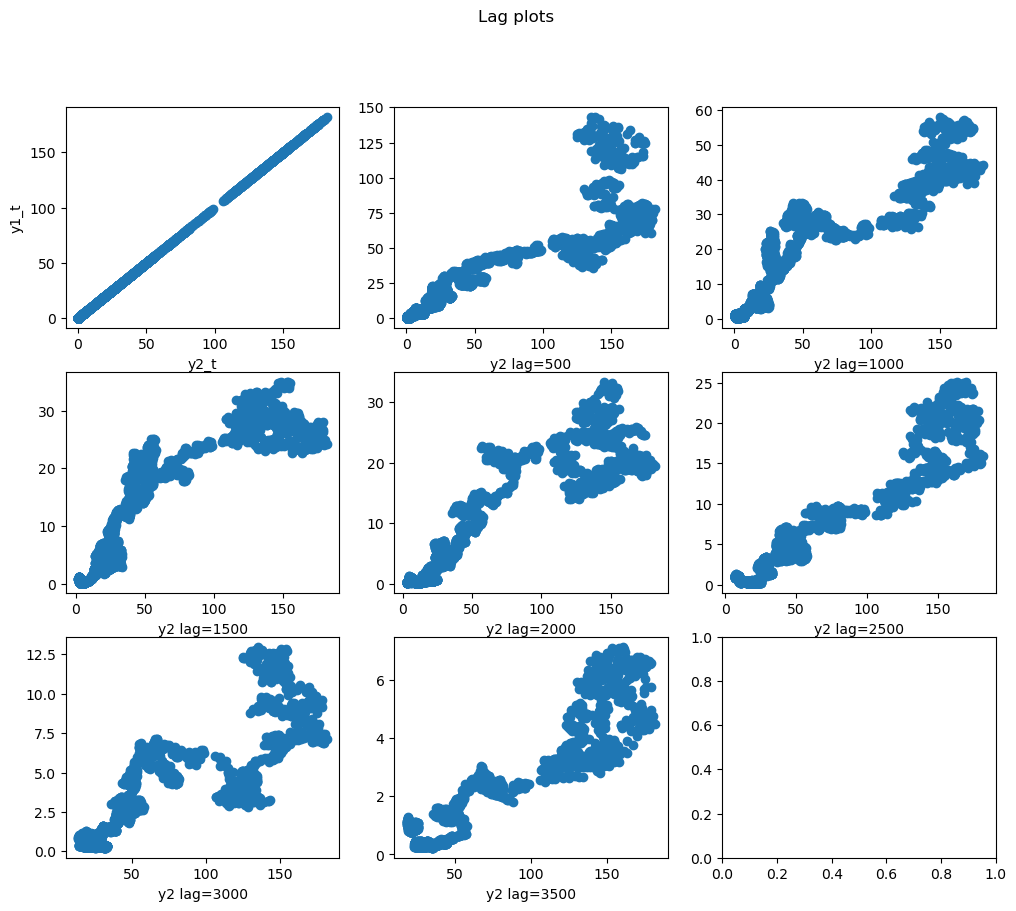

In [121]:
lag_plots(y1,y1,d_lag=500,NLag=7)

## Apply Differencing (lag=10): Line plot

In [122]:
# GET DATA
LD=10 #lag_for_differencing

# GENERATE PLOTLY FIGURE
title=str(stock_ticker_1)+" after applying differencing using a lag of "+str(LD)+ " day"
plotly_line_plot([*range(0,len(y1[0:-LD]))],[y1[0:-LD]-y1[LD:]],title=title,y_label="differencing with lag="+str(LD))


## Apply Differencing (lag=10): Lag plots

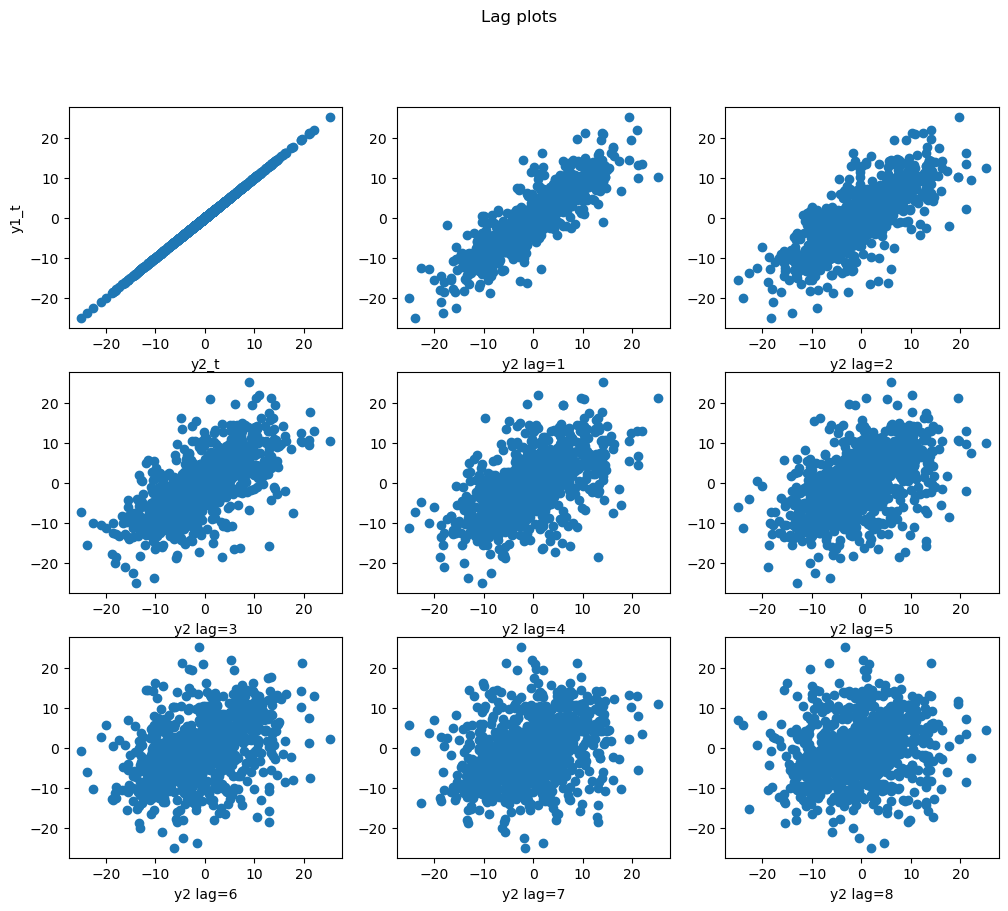

In [123]:
lag_plots(y1[0:-LD]-y1[LD:],y1[0:-LD]-y1[LD:],d_lag=1,NLag=8)

# Auto and cross-correlation functions  
See the following [source](https://scicoding.com/4-ways-of-calculating-autocorrelation-in-python/)

In [124]:
# # DIRECT CALCULATION UTILITY FUNCTION 
# def cross_correlation(y1,y2, wrap=True, normalize=True): 
#     # print(y1.shape,y2.shape)
    
#     # ERRORS
#     if(len(y1)!=len(y2)):
#         print("ERROR: y1 and y2 must have the same length"); return
        
#     # CONVERT 
#     y1=np.array(y1)
#     y2=np.array(y2)
#     # print(y1.shape,y2.shape)

#     # COMPUTE 
#     u1=np.mean(y1); s1=np.std(y1)
#     u2=np.mean(y2); s2=np.std(y2)

#     # INITIALIZE
#     lags=[*range(0,len(y1))]
#     CCF=[]
#     CCF.append(np.mean((y1-u1)*(y2-u2)))
    
#     for l in lags[1:]:
#         # USE PERIODIC WRAPPING
#         if wrap:
#             CCF.append(np.mean((y1-u1)*(np.roll(y2,-l)-u2)))     
            
#         # DONT' USE PERIODIC WRAPPING
#         else: 
#             # print(y1[0:-l].shape,y2[l:].shape)
#             if(l==len(lags)): break
#             CCF.append( np.mean((y1[0:-l]-u1)*(y2[l:]-u2))) 
                   
#     if normalize:
#         CCF=CCF/s1/s2        
        
#     return [lags,CCF]

# [lags,CCF2]=cross_correlation(y1,y1,wrap=False)  
# plotly_line_plot(lags,[CCF2],title="ACF-1 (APPLE)",x_label="lag tau(days)",y_label="ACF")

## Using WK theorem + FFT

In [125]:

# #ACF BY WK THEOREM (1/N is )
# #1/N is to compute the average ifft(SPD) returns ACF sum not the average
# plt.plot(t,np.real(ifft(np.absolute(fft(s))**2.0))/N, 'o');

# #DIRECT COMPUTE WITH NUMPY

# # np.correlate example
# 	# INDICES FOR LEN=4 --> 0 1 2 3
# 	# tau -3        -2       -1       0        1        2         3
# 	#      0 1 2 3  0 1 2 3  0 1 2 3  0 1 2 3  0 1 2 3  0 1 2 3   0 1 2 3
# 	# X    0        0 1      0 1 2    0 1 2 3    1 2 3      2 3         3
# 	# Y    3        2 3      1 2 3    0 1 2 3    0 1 2      0 1         0 

# tau=range(-N+1,N)*dt;  tau=tau[N:]
# acf_direct=np.correlate(s, s, mode='full') 
# acf_direct=acf_direct[N:]	
# plt.plot(tau,acf_direct/N, '-');		#expected solution

# #EXACT SOLUTION
# if str(ACF(t))!="NA": plt.plot(t,ACF(t), '-');				#expected solution

# plt.show()


In [126]:

# import statsmodels.api as sm

# #calculate cross correlation function
# CCF1=sm.tsa.stattools.ccf(y1, y1, adjusted=False,fft=True)


# [lags,CCF2]=cross_correlation(y1,y1,wrap=True)  
# plotly_line_plot(lags,[CCF1,CCF2+0.01],title="ACF-1 (APPLE)",x_label="lag tau(days)",y_label="ACF")

## Power spectrum 

In [127]:
# from  scipy.fft import fft,fftfreq,ifft

# def power_spectrum_plot(s,dt=1):

#     N=len(s);  			#NUMBER OF POINTS 
#     fn=fftfreq(N)/(dt)	#SET OF FREQ FOR PLOTTING (Hz)

#     # FOURIER TRANSFORM 
#     FT=fft(s)

#     # EXTRACT SIN AND COS AMPLITUDES
#     # (FACTOR OF 2 IS FOR CONVERSION FROM REAL TO COMPLEX)
#     # sum(an*cos(wt)+bn*sin(wt))
#     an=2*np.real(FT)/N
#     bn=-2*np.imag(FT)/N
#     SPD=np.absolute(FT)**2.0

#     # PLOT SIN/COS AMPLITUDES 
#     # plt.plot(fn,an, '-o'); plt.show()
#     # plt.plot(fn,bn, '-o'); plt.show()

#     #SPECTRAL POWER DENSITY 
#     #(FACTOR OF 4 IS FOR CONVERSION FROM REAL TO COMPLEX)
#     #N SQUARE IS FOR SCIPY NORMALIZATION CONVENTION 
#     # plt.plot(fn,4*SPD/N/N,'-o'); plt.show()
#     plotly_line_plot((1./fn)/365.,[4*SPD/N/N],title="ACF-1 (APPLE)",x_label="Oscillation period (1/f) (years)",y_label="Power spectrum")


# power_spectrum_plot(y1)
